# TIPS Dataset - Analysis #

**Business Problem:**  The restaurant is currently open 4 days in the week, and the owner wants to operate for 3 days instead of four. Our study aims to determine the most suitable day for closure.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def first_view(data):
    """
    This function allows to check the variables name, and types.
    Additionaly it allows to check the percentage of null values for each variable

    input: dataframe to be queried
    """
    dtype=df.info()
    null_percentage=(df.isnull().sum() / df.shape[0] * 100)
    null_df = pd.DataFrame({'variable': null_percentage.index, 
                        'null_percentage': null_percentage.values})
    null_df.columns=[['variables', 'null_percentage']]
    return print(dtype, 
                 null_df)

In [3]:
#extracting data from PyladiesSP 
url = 'https://raw.githubusercontent.com/PyLadiesSP/data-science/master/Oficinas/oficina_introdu%C3%A7%C3%A3o_estatistica_pandas/tips.csv'
df = pd.read_csv(url)
df = np.round(df, decimals=2)

In [4]:
first_view(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_conta        244 non-null    float64
 1   gorjeta            244 non-null    float64
 2   genero             244 non-null    object 
 3   fumante            244 non-null    object 
 4   dia                244 non-null    object 
 5   horario            244 non-null    object 
 6   pessoas_mesa       244 non-null    int64  
 7   tempo_permanencia  244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None            variables null_percentage
0        total_conta             0.0
1            gorjeta             0.0
2             genero             0.0
3            fumante             0.0
4                dia             0.0
5            horario             0.0
6       pessoas_mesa             0.0
7  tempo_permanencia             0.0


* This dataset contains 8 variables that types are float, object and integer.
* Also, it does not have null values

**Variables:**

* total_conta, value total of the bill per table
* gorjeta, value total of the tip per table
* genero, gender
* fumante, smokking person (yes/no)
* dia, week day
* horario, payment time
* pessoas_mesa, number of people for each table
* tempo_permamencia, how much time people stayed in the restaurant

## Bill Value Distribuition  per day per table ##

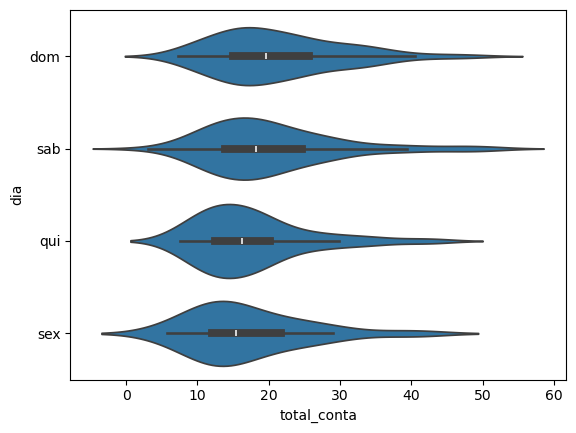

In [5]:
sns.violinplot(data=df, x='total_conta', y='dia');

In [6]:
np.round(df.groupby('dia')['total_conta'].agg(['median', 'mean','std']),1)

,median,mean,std
dia,,,
dom,19.6,21.4,8.8
qui,16.2,17.7,7.9
sab,18.2,20.4,9.5
sex,15.4,17.2,8.3


Our analysis reveals that bill values tend to be more variable on Saturdays and lower on Thursdays. Additionally, Fridays show the lowest values in both median and mean

## Average ticket by person per day ##

In [7]:
people_df=pd.DataFrame(df.groupby('dia')['pessoas_mesa'].sum())
people_df=people_df.reset_index()

bill_df=pd.DataFrame(df.groupby('dia')['total_conta'].sum()).reset_index()


mean_ticket_df=people_df.merge(bill_df, on=('dia'), how='left')
mean_ticket_df['mean_ticket']=mean_ticket_df['total_conta']/mean_ticket_df['pessoas_mesa']
mean_ticket_df=mean_ticket_df.sort_values(by='pessoas_mesa',ascending=False)

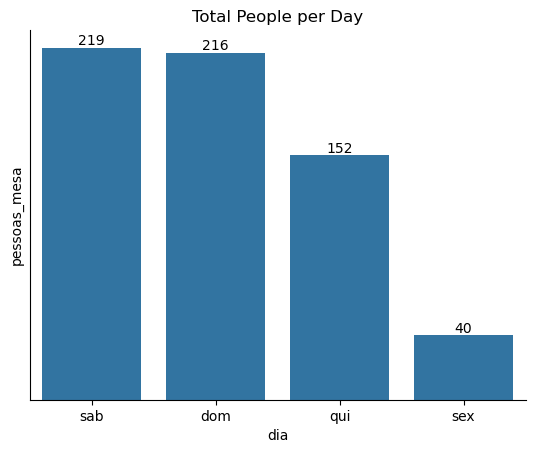

In [9]:
ax = sns.barplot(data=mean_ticket_df, x='dia', y='pessoas_mesa')
ax.bar_label(ax.containers[0])
ax.set_yticks([])
sns.despine()
ax.set_title(label="Total People per Day");


In [10]:
mean_ticket_df[['dia','mean_ticket']]

,dia,mean_ticket
2,sab,8.120548
0,dom,7.533148
1,qui,7.212697
3,sex,8.147000


When analyzing the average ticket per person per day, we observe that Friday exhibits the highest average ticket per person, despite the restaurant receiving a relatively low number of customers.

In [21]:
#checking Friday min and max bill value
df.loc[(df['dia']=='sex'),'total_conta'].agg(['min','max'])

min     5.75
max    40.17
Name: total_conta, dtype: float64

<p>Both analyses indicate that the restaurant experiences higher customer traffic and generates higher average bills per table on weekends.</p>
To investigate whether there's a significant difference between the median bill values of Thursday and Friday, we would like to conduct a statistical analysis. However, our dataset presents a significant imbalance, with only 19 observations for Fridays compared to 62 for Thursdays (a 226% difference).</p>
While non-parametric tests can be used with smaller sample sizes, we have concerns about the reliability of the results given this substantial disparity.

In [23]:
#checking total of observations per day
df['dia'].value_counts()

dia
sab    87
dom    76
qui    62
sex    19
Name: count, dtype: int64

**Actions Suggestions:**

* Keeping the restaurant open for four days in the week, collecting more data in order to perform a posteriori analysis;
* Analyzing the operation per day cost to check which days are more profitable and less profitable.